In [ ]:
https://habr.com/ru/post/471198/
https://habr.com/ru/post/331560/
https://numpy.org/doc/stable/reference/random/generated/numpy.random.laplace.html
https://notebook.community/Diyago/Machine-Learning-scripts/statistics/%D0%93%D1%80%D0%B0%D1%84%D0%B8%D0%BA%D0%B8%2C%20%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F%2C%20%D1%86%D0%B5%D0%BD%D1%82%D1%80%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F%20%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F%20%D1%82%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0

<h1 style="color:black" align="center">Центральная предельная теорема</h1>

<h2 style="color:#008B8B">Экспоненциальное распределение</h2>

Для проведения эксперимента нам потребуется выбрать распределение, из которого случайным образом будет формироваться выборка. В нашем случае мы воспользуемся распределением Лапласа.

**Плотность вероятности** $\large {\displaystyle {\frac {\alpha }{2}}\,e^{-\alpha |x-\beta |}}$, где

$\large \textstyle\alpha>0$ — коэффициент масштаба. Коэффициент масштаба — это параметр вероятностного распределения. Физически конкретное значение данного параметра может быть связано с выбором шкалы измерения.


$\large \beta\in\mathbb{R}$ — коэффициент сдвига. Коэффициент сдвига — это параметр вероятностного распределения, имеющий специальный вид. Физически конкретное значение данного параметра может быть связано с выбором точки отсчёта шкалы измерения.

**Носитель** $\displaystyle x\in (-\infty ;\infty )$

**Математическое ожидание** равно $\large \beta$

**Дисперсия** равна $\large \frac{2}{\alpha^2}$

Остальную информацию можно найти на <a href='https://ru.wikipedia.org/wiki/Распределение_Лапласа'>википедии</a>.

### Подключение библиотек

In [259]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams
from scipy import stats

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
rcParams['figure.figsize'] = 6, 4

<h2 style="color:#008B8B">Построение гистограммы распределения</h2>

 Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

In [244]:
# Формирование выборки
loc = 0.  # Коэффициент сдвига betta
scale = 1.  # Коэффициент масштаба lambda

sample = np.random.laplace(loc, scale, 1000)

# Расчёт теоритического распределения
x = np.arange(-10., 10., .01)
pdf = scale/2 * np.e**(-scale * abs(x - loc))

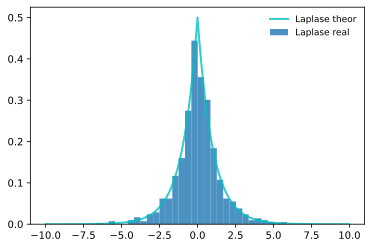

In [245]:
plt.hist(sample, bins=30, density=True, alpha=0.8, label='Laplase real')
plt.plot(x, pdf, 'c-', alpha=0.8, lw=2, label='Laplase theor')

plt.legend(loc='upper right', fontsize=9, frameon=False)
plt.show()

<h2 style="color:#008B8B">Отображение выборочных средних</h2>

Отобразим то, как выглядят выборочные средние. Этот момент позволяет оценить то, насколько хорошо выборочные срдение описывают генеральную совокупность.

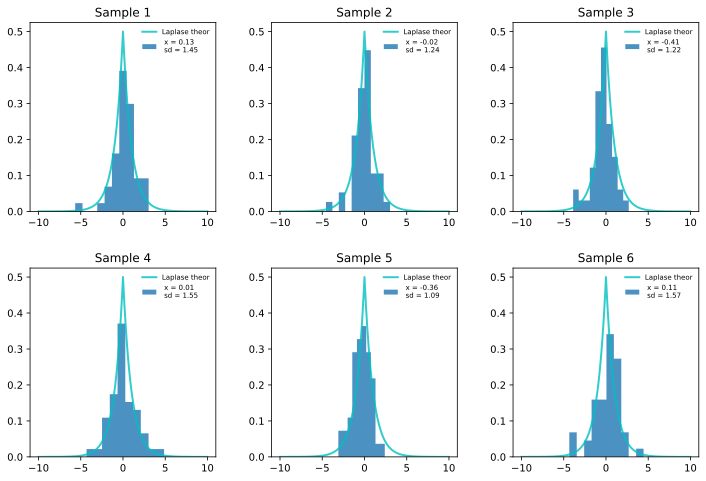

In [352]:
selections_mean = np.array([])

# Создаём 1000 выборок по 50 наблюдений в каждой
selections = np.random.choice(sample, (1000, 50))

#  Создаем "Figure" и "Axes":
fig, axes = plt.subplots(nrows = 2, ncols = 3)

# Выпрямляем axes, для удобного обращения
axes = axes.flatten()

# Проходим циклом по кажой выборке
for number_axes, selection in enumerate(selections):
    
    if number_axes < 6: # Строим первые 6 графиков
        
        # Расчёт теоритического распределения
        x = np.arange(-10., 10., .01)
        pdf = np.exp(-abs(x-loc)/scale)/(2.*scale)
        axes[number_axes].plot(x, pdf, 'c-', alpha=0.8, lw=2, label='Laplase theor')
        
        # Строим гистограмму
        axes[number_axes].hist(selection, density=True, histtype='stepfilled', alpha=0.8, label = f' x = {selection.mean():.2f} \n sd = {selection.std():.2f}')

        # Настройка легенды
        axes[number_axes].legend(loc='upper right', fontsize=7, frameon=False)

        # Добавление заголовков
        axes[number_axes].set(title = f'Sample {number_axes + 1}')

        # Задаём значение ширины и высоты фигуры в дюймах
        fig.set_size_inches(12, 8)

        # Увеличение ширины фигуры 
        # 0.3 - это не дюймы, а доля от среднего значения горизонтальных осей графиков
        # wspace - начинаится с буквы W, так как это сокращение от width (Ширина) Отвечает за растояние между графиками по горизонатли
        plt.subplots_adjust(wspace=0.3, hspace=0.30)
    
    # Сохранение результатов в массив
    selections_mean = np.append(selections_mean, [selection.mean()])
    
plt.show()

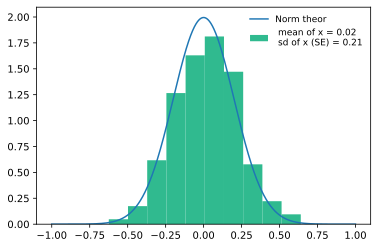

In [355]:
plt.hist(selections_mean, density=True, color='#30ba8f',label = f' mean of x = {selections_mean.mean():.2f} \n sd of x (SE) = {selections_mean.std():.2f}')

x = np.arange(-1, 1, .0001)

norm_rv = stats.norm(mu, sigma/ math.sqrt(50))
plt.plot(x,norm_rv.pdf(x),label='Norm theor')


plt.legend(loc='upper right', fontsize=9, frameon=False)

plt.show()

Если внутри каждой из выборок оценка реального показателя может быть не столь точной, то в среднем выборочные средние значения предоставят хороший показатель и среднее всех средних будет очень близко к среднему в ГС. На гистограмме мы видим, что большенство всех наших выборочных средних лежат рядом с нулём и какие-то отклоняются в положительную сторону и в отрицательную.

Стандартное отклонение данного распределения называется стандартной ошибкой среднего и показывает на сколько в среднем выборочные значения отклоняются от среднего ГС (от среднего средних, так как оно имеет близкое значение к ГС, можно считать среднее средних - средним ГС).

**Что если увеличить объём каждой из выборок?**
Распределение признака в выборках станет напоминать картину из ГС (множество выборок вторая гистограмма). Выборочные оценки станут тоже более точными. Если мы посмотрим на выборочное распределение средних значений (зелёная гистограмма), то стандартная ошибка уменьшится, так как большинство всех выборочных наблюдений будут лежать близко с реальным показателем (средним ГС).

<h2 style="color:#008B8B">Построение распределения выборочных средних</h2>

### Расчёт параметров

**Математическое ожидание** равно $\beta$ (коэффициент сдвига), который имеет значение равное $0$.

**Дисперсия** равна $\frac{2}{\alpha^2}$, где $\alpha = 1$ представляет собой коэффициент масштаба. Получаем:

$D = \large \frac{2}{\alpha^2} = \frac{2}{1^2} = 2$

**Среднеквадратичное отклонение** 

$\large \sigma = \sqrt{D} = \sqrt{2}$

**Стандартная ошибка среднего**

$\large SE = \frac{\sigma}{\sqrt{n}}$

### Определение функций

**Функция формирования выборочных средних**

In [290]:
def creat_samples(loc, scale, size=30, count_samples=1000):
    samples = np.array([])
    
    for i in range(count_samples):
        samples = np.append(samples, np.random.laplace(loc, scale, size).mean())
    return samples

**Функция построения графика выборочных средних**

In [347]:
def plot_hist(sigma, mu, size, count_samples, loc=0., scale=1.):
    SE = sigma / math.sqrt(size)
    
    # Формирование выборок из экспоненциального распределения определённого размера
    means_samples = creat_samples(loc=loc, scale=scale, size=size, count_samples=count_samples)
    # Построение гистограммы выборочных средних
    plt.hist(means_samples, density=True, color='#30ba8f',label = f' mean of x = {means_samples.mean():.5f} \n sd of x (SE) = {means_samples.std():.5f}')
    
    # Расчёт теоритического нормального распределения
    x = np.arange(-4, 4, .0001)
    norm_rv = stats.norm(mu, SE)
    # Построение теоретического нормального распределения
    plt.plot(x,norm_rv.pdf(x),label='Norm theor')
    
    plt.legend(loc='upper right', fontsize=9, frameon=False)
    print(SE)

0.6324555320336759


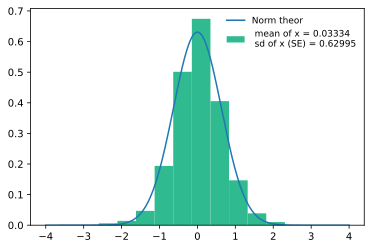

In [351]:
plot_hist(sigma, mu, 5, 1000)

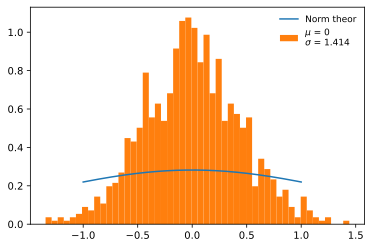

In [271]:
D, mu = 2, 0 
sigma = math.sqrt(D)
SE = sigma/ math.sqrt(50)


samples = creat_samples(mu, sigma, 10, 1000)

norm_rv = stats.norm(mu, sigma)
plt.plot(x,norm_rv.pdf(x),label='Norm theor')


plt.hist(samples, bins=50, density=True, label = f'$\mu$ = {mu} \n$\sigma$ = {sigma:.3f}')
plt.legend(loc='upper right', fontsize=9, frameon=False)
plt.show()

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?